# 1. Loading data.

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1.1. Firstly we load the data and filter the columns.

In [63]:
df = pd.read_csv("/home/alberto/Documentos/MatchingLearning/Practicas/Moriarty2.csv",
                  usecols=["UUID","ActionType"])

df2 = pd.read_csv("/home/alberto/Documentos/MatchingLearning/Practicas/T4.csv", 
                  usecols=["UUID", "CPU_0", "CPU_1", "CPU_2", "CPU_3", 
                           "Traffic_TotalRxBytes", "Traffic_TotalTxBytes", "MemFree"])

## 1.2. Merging the two datasets.

The first thing we need to do it is to convert column 'UUID' (which is a timestamp in milliseconds) into a date timestamp.

In [64]:
df['UUID'] = pd.to_datetime(df['UUID'], unit="ms")
df['UUID'] = df['UUID'].dt.round('t')


df2['UUID'] = pd.to_datetime(df['UUID'], unit="ms")
df2['UUID'] = df['UUID'].dt.round('t')

Merge the two datasheets on the column to set the desired combinations.

In [65]:
data = pd.merge(df,df2, on=['UUID'])

## 1.3. Replace ActionType.

We need numeric values in the columns, so we replace ActionType malicious/benign by 1/0 respectively. And finally we don't need column 'UUID' for the predicting model so we remove it.

In [66]:
data['ActionType'] = data['ActionType'].replace(['malicious'], 1)
data['ActionType'] = data['ActionType'].replace(['benign'], 0)
data = data.drop('UUID', 1)

# 2. PCA.

# 2.1. Scalation.

In [67]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
datanorm = scaler.fit_transform(data)

## 2.2. Modelling (PCA).

In [68]:
from sklearn.decomposition import PCA
n_components = 2
estimator = PCA(n_components)
X_pca = estimator.fit_transform(datanorm)

# 3. KNN Classification.

In [72]:
x = X_pca
y = data['ActionType']

In [73]:
from sklearn import neighbors
from matplotlib.colors import ListedColormap

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

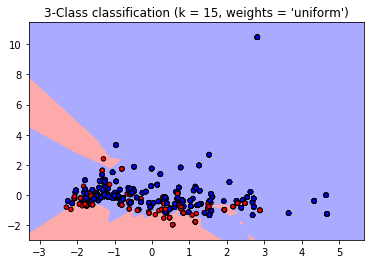

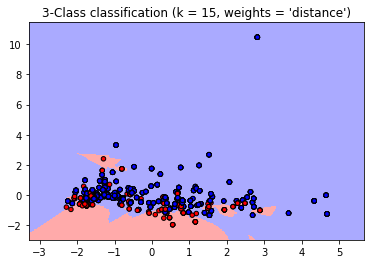

In [74]:
for weights in ['uniform', 'distance']:
    n_neighbors = 15
    # Instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(x,y)
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
plt.show()